In [5]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [7]:
spark = SparkSession.builder.getOrCreate()
spark

In [8]:
data = spark.read.csv('/content/precredit_train.csv',inferSchema=True,header=True,sep=";")
data.show()

+------+------+------+--------------+------+------------+--------+----------------+--------+------+--------------------+--------------------+--------------------+-------------------+--------+---------+-----------------+--------------+----------------+------------+--------------------+-------------------+-------------------+-------------------+-----------------+------------+-------+-----------+---------+--------+--------+--------+-----------------+------------+-------+---------------+---------+-----------+-----------------+----------------+---------+----------------+------------+---------------+-------------+------------+-----------+----------+---------+-----------+-------------------------+
|  NULL|LN_ID1|TARGET|CONTRACT_TYPE3|GENDER|NUM_CHILDREN|  INCOME|APPROVED_CREDIT7|ANNUITY8|PRICE9|         INCOME_TYPE|           EDUCATION|       FAMILY_STATUS|       HOUSING_TYPE|DAYS_AGE|DAYS_WORK|DAYS_REGISTRATION|DAYS_ID_CHANGE|WEEKDAYS_APPLY18|HOUR_APPLY19|   ORGANIZATION_TYPE|        EXT_SCO

In [9]:
row = data.count()
col = len(data.columns)
print("filas:", row)
print("columnas:",col) 


filas: 61503
columnas: 51


In [10]:
#eliminamos las columnas que no necesitamos
data = data.drop(*['NULL', 'MyUnknownColumn24', 'LN_ID1', 'MyUnknownColumn32', 'SK_ID_PREV25', 'LN_ID26', 'CONTRACT_TYPE35'])
data.show()

+------+--------------+------+------------+--------+----------------+--------+------+--------------------+--------------------+--------------------+-------------------+--------+---------+-----------------+--------------+----------------+------------+--------------------+-------------------+-------------------+-------------------+-----------+---------+--------+--------+--------+------------+-------+---------+-----------+-----------------+----------------+---------+----------------+------------+---------------+-------------+------------+-----------+----------+---------+-----------+-------------------------+
|TARGET|CONTRACT_TYPE3|GENDER|NUM_CHILDREN|  INCOME|APPROVED_CREDIT7|ANNUITY8|PRICE9|         INCOME_TYPE|           EDUCATION|       FAMILY_STATUS|       HOUSING_TYPE|DAYS_AGE|DAYS_WORK|DAYS_REGISTRATION|DAYS_ID_CHANGE|WEEKDAYS_APPLY18|HOUR_APPLY19|   ORGANIZATION_TYPE|        EXT_SCORE_1|        EXT_SCORE_2|        EXT_SCORE_3|INST_NUMBER|INST_DAYS|PAY_DAYS|AMT_INST| AMT_PAY|SK_ID_P

In [11]:
data.printSchema()

root
 |-- TARGET: integer (nullable = true)
 |-- CONTRACT_TYPE3: string (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- NUM_CHILDREN: integer (nullable = true)
 |-- INCOME: double (nullable = true)
 |-- APPROVED_CREDIT7: double (nullable = true)
 |-- ANNUITY8: string (nullable = true)
 |-- PRICE9: string (nullable = true)
 |-- INCOME_TYPE: string (nullable = true)
 |-- EDUCATION: string (nullable = true)
 |-- FAMILY_STATUS: string (nullable = true)
 |-- HOUSING_TYPE: string (nullable = true)
 |-- DAYS_AGE: integer (nullable = true)
 |-- DAYS_WORK: integer (nullable = true)
 |-- DAYS_REGISTRATION: integer (nullable = true)
 |-- DAYS_ID_CHANGE: integer (nullable = true)
 |-- WEEKDAYS_APPLY18: string (nullable = true)
 |-- HOUR_APPLY19: integer (nullable = true)
 |-- ORGANIZATION_TYPE: string (nullable = true)
 |-- EXT_SCORE_1: string (nullable = true)
 |-- EXT_SCORE_2: string (nullable = true)
 |-- EXT_SCORE_3: string (nullable = true)
 |-- INST_NUMBER: string (nullable = tr

In [12]:
#tenemos variables que son numericas como string, debemos cambiarlas a numericas.
data1 = (data.withColumn('ANNUITY8', data["ANNUITY8"].cast("float"))
.withColumn('PRICE9', data.PRICE9.cast('double'))
.withColumn('EXT_SCORE_1', data.EXT_SCORE_1.cast('float'))
.withColumn('EXT_SCORE_2', data.EXT_SCORE_2.cast('float'))
.withColumn('EXT_SCORE_3', data.EXT_SCORE_3.cast('float'))
.withColumn('INST_NUMBER',data.INST_NUMBER.cast('double'))
.withColumn('INST_DAYS',data.INST_DAYS.cast('double'))
.withColumn('PAY_DAYS',data.PAY_DAYS.cast('double'))
.withColumn('AMT_INST',data.AMT_INST.cast('float'))
.withColumn('AMT_PAY',data.AMT_PAY.cast('float'))
.withColumn('SK_ID_PREV33',data.SK_ID_PREV33.cast('double'))
.withColumn('LN_ID34',data.LN_ID34.cast('double'))
.withColumn('ANNUITY36',data.ANNUITY36.cast('float'))
.withColumn('APPLICATION',data.APPLICATION.cast('float'))
.withColumn('APPROVED_CREDIT38',data.APPROVED_CREDIT38.cast('float'))
.withColumn('AMT_DOWN_PAYMENT',data.AMT_DOWN_PAYMENT.cast('float'))
.withColumn('PRICE40',data.PRICE40.cast('float'))
.withColumn('HOUR_APPLY42',data.HOUR_APPLY42.cast('integer'))
.withColumn('DAYS_DECISION',data.DAYS_DECISION.cast('integer'))
.withColumn('TERM_PAYMENT',data.TERM_PAYMENT.cast('float'))
.withColumn('FIRST_DRAW',data.FIRST_DRAW.cast('float'))
.withColumn('FIRST_DUE',data.FIRST_DUE.cast('float'))
.withColumn('TERMINATION',data.TERMINATION.cast('float'))
.withColumn('NFLAG_INSURED_ON_APPROVAL',data.NFLAG_INSURED_ON_APPROVAL.cast('float'))

)

data1.printSchema()

root
 |-- TARGET: integer (nullable = true)
 |-- CONTRACT_TYPE3: string (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- NUM_CHILDREN: integer (nullable = true)
 |-- INCOME: double (nullable = true)
 |-- APPROVED_CREDIT7: double (nullable = true)
 |-- ANNUITY8: float (nullable = true)
 |-- PRICE9: double (nullable = true)
 |-- INCOME_TYPE: string (nullable = true)
 |-- EDUCATION: string (nullable = true)
 |-- FAMILY_STATUS: string (nullable = true)
 |-- HOUSING_TYPE: string (nullable = true)
 |-- DAYS_AGE: integer (nullable = true)
 |-- DAYS_WORK: integer (nullable = true)
 |-- DAYS_REGISTRATION: integer (nullable = true)
 |-- DAYS_ID_CHANGE: integer (nullable = true)
 |-- WEEKDAYS_APPLY18: string (nullable = true)
 |-- HOUR_APPLY19: integer (nullable = true)
 |-- ORGANIZATION_TYPE: string (nullable = true)
 |-- EXT_SCORE_1: float (nullable = true)
 |-- EXT_SCORE_2: float (nullable = true)
 |-- EXT_SCORE_3: float (nullable = true)
 |-- INST_NUMBER: double (nullable = true)


In [13]:
#nos quedamos con las variables categoricas y vemos cuantos valores distintos hay

data1.createOrReplaceTempView("data1_convert")
datos3=spark.sql("SELECT CONTRACT_TYPE3,GENDER,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,WEEKDAYS_APPLY18,ORGANIZATION_TYPE,WEEKDAYS_APPLY41,CONTRACT_STATUS,YIELD_GROUP from data1_convert")


datos3.select("CONTRACT_TYPE3").distinct().show()
datos3.select("GENDER").distinct().show()
datos3.select("INCOME_TYPE").distinct().show()
datos3.select("EDUCATION").distinct().show()
datos3.select("FAMILY_STATUS").distinct().show()
datos3.select("HOUSING_TYPE").distinct().show()
datos3.select("WEEKDAYS_APPLY18").distinct().show()
datos3.select("ORGANIZATION_TYPE").distinct().show(25)
datos3.select("WEEKDAYS_APPLY41").distinct().show()
datos3.select("CONTRACT_STATUS").distinct().show(25)
datos3.select("YIELD_GROUP").distinct().show()


+---------------+
| CONTRACT_TYPE3|
+---------------+
|Revolving loans|
|     Cash loans|
+---------------+

+------+
|GENDER|
+------+
|     F|
|     M|
+------+

+--------------------+
|         INCOME_TYPE|
+--------------------+
|             Student|
|Commercial associate|
|         Businessman|
|       State servant|
|             Working|
|           Pensioner|
|          Unemployed|
+--------------------+

+--------------------+
|           EDUCATION|
+--------------------+
|     Academic degree|
|   Incomplete higher|
|Secondary / secon...|
|     Lower secondary|
|    Higher education|
+--------------------+

+--------------------+
|       FAMILY_STATUS|
+--------------------+
|           Separated|
|             Married|
|Single / not married|
|               Widow|
|      Civil marriage|
+--------------------+

+-------------------+
|       HOUSING_TYPE|
+-------------------+
|  House / apartment|
|Municipal apartment|
|    Co-op apartment|
|   Rented apartment|
|   Office a

In [14]:
#cHEQUEAMOS LOS NAs

#Chequeamos los valores nulos y faltantes

from pyspark.sql.functions import col, isnan,when, count
data2 = data1.select([count(when(col(c).contains('None') | \
                                col(c).contains('NULL') | \
                                col(c).contains('Null') | \
 #                               col(c).contains('NA1')  | \
                                (col(c) == ' ' ) | \
                                col(c).isNull() | \
                                isnan(c),c
                                )).alias(c)
                                for c in data1.columns])
data2.show()

+------+--------------+------+------------+------+----------------+--------+------+-----------+---------+-------------+------------+--------+---------+-----------------+--------------+----------------+------------+-----------------+-----------+-----------+-----------+-----------+---------+--------+--------+-------+------------+-------+---------+-----------+-----------------+----------------+-------+----------------+------------+---------------+-------------+------------+-----------+----------+---------+-----------+-------------------------+
|TARGET|CONTRACT_TYPE3|GENDER|NUM_CHILDREN|INCOME|APPROVED_CREDIT7|ANNUITY8|PRICE9|INCOME_TYPE|EDUCATION|FAMILY_STATUS|HOUSING_TYPE|DAYS_AGE|DAYS_WORK|DAYS_REGISTRATION|DAYS_ID_CHANGE|WEEKDAYS_APPLY18|HOUR_APPLY19|ORGANIZATION_TYPE|EXT_SCORE_1|EXT_SCORE_2|EXT_SCORE_3|INST_NUMBER|INST_DAYS|PAY_DAYS|AMT_INST|AMT_PAY|SK_ID_PREV33|LN_ID34|ANNUITY36|APPLICATION|APPROVED_CREDIT38|AMT_DOWN_PAYMENT|PRICE40|WEEKDAYS_APPLY41|HOUR_APPLY42|CONTRACT_STATUS|DAYS_

In [15]:
#CONVERTIMOS LAS VARIABLES CATEGORICOS A NUMERICOS, Y EN ESTE CASO SE AGREGA UNA VARIABLE LLAMADA CONTRACT_TYPE3_INDEX AL FINAL.

from pyspark.ml.feature import StringIndexer

CONTRACT_TYPE3_index = StringIndexer(inputCol="CONTRACT_TYPE3",
outputCol="CONTRACT_TYPE3_NUEVA")

datos2 = CONTRACT_TYPE3_index.fit(data1).transform(data1)
datos2 = datos2.drop(*['CONTRACT_TYPE3'])
datos2.show()

+------+------+------------+--------+----------------+--------+--------+--------------------+--------------------+--------------------+-------------------+--------+---------+-----------------+--------------+----------------+------------+--------------------+-----------+-----------+-----------+-----------+---------+--------+-----------+---------+------------+--------+-----------+-----------+-----------------+----------------+---------+----------------+------------+---------------+-------------+------------+-----------+----------+---------+-----------+-------------------------+--------------------+
|TARGET|GENDER|NUM_CHILDREN|  INCOME|APPROVED_CREDIT7|ANNUITY8|  PRICE9|         INCOME_TYPE|           EDUCATION|       FAMILY_STATUS|       HOUSING_TYPE|DAYS_AGE|DAYS_WORK|DAYS_REGISTRATION|DAYS_ID_CHANGE|WEEKDAYS_APPLY18|HOUR_APPLY19|   ORGANIZATION_TYPE|EXT_SCORE_1|EXT_SCORE_2|EXT_SCORE_3|INST_NUMBER|INST_DAYS|PAY_DAYS|   AMT_INST|  AMT_PAY|SK_ID_PREV33| LN_ID34|  ANNUITY36|APPLICATION|APP

In [16]:
from pyspark.ml import Pipeline
#create a list of the columns that are string typed
categoricalColumns = [item[0] for item in datos2.dtypes if item[1].startswith('string') ]

#define a list of stages in your pipeline. The string indexer will be one stage
stages = []

#iterate through all categorical values
for categoricalCol in categoricalColumns:
    #create a string indexer for those categorical values and assign a new name including the word 'Index'
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + '_NUEVAS')

    #append the string Indexer to our list of stages
    stages += [stringIndexer]

#Create the pipeline. Assign the satges list to the pipeline key word stages
pipeline = Pipeline(stages = stages)
#fit the pipeline to our dataframe
pipelineModel = pipeline.fit(datos2)
#transform the dataframe
df= pipelineModel.transform(datos2)
df.show(10)
#eliminamos las variables que no necesitamos
df = df.drop(*categoricalColumns)
df.show(10)

+------+------+------------+--------+----------------+--------+--------+--------------------+--------------------+--------------------+-------------------+--------+---------+-----------------+--------------+----------------+------------+--------------------+-----------+-----------+-----------+-----------+---------+--------+-----------+---------+------------+--------+-----------+-----------+-----------------+----------------+---------+----------------+------------+---------------+-------------+------------+-----------+----------+---------+-----------+-------------------------+--------------------+-------------+------------------+----------------+--------------------+-------------------+-----------------------+------------------------+-----------------------+----------------------+------------------+
|TARGET|GENDER|NUM_CHILDREN|  INCOME|APPROVED_CREDIT7|ANNUITY8|  PRICE9|         INCOME_TYPE|           EDUCATION|       FAMILY_STATUS|       HOUSING_TYPE|DAYS_AGE|DAYS_WORK|DAYS_REGISTRATIO

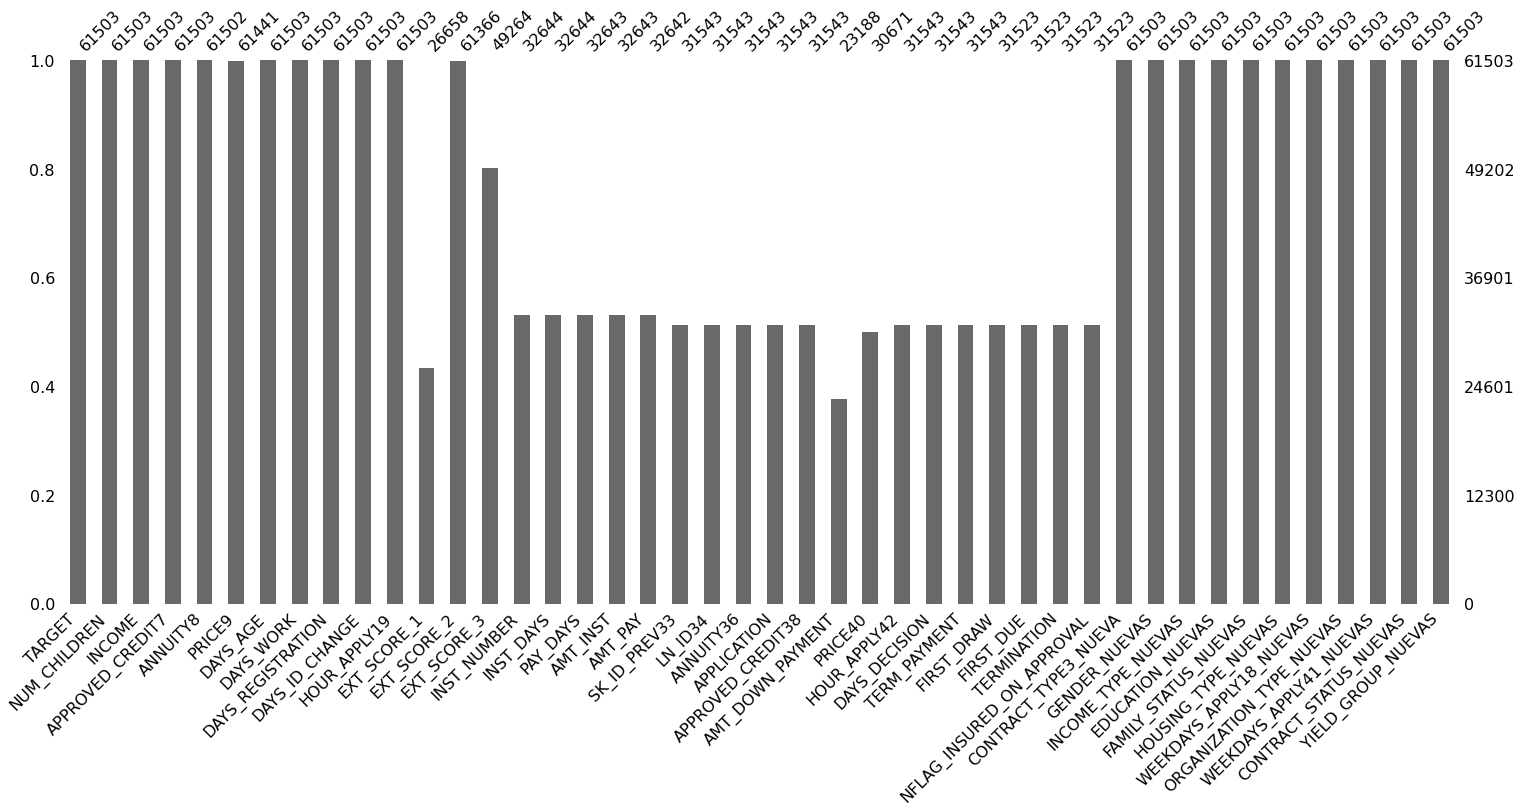

In [17]:
#pip install missingno

import missingno as msno
msno.bar(df.toPandas())

In [18]:
#imputamos datos faltantes con la media

from pyspark.sql.functions import avg

imputedf = df

for i in imputedf.columns:
  meanvalue = df.agg(avg(i)).first()[0]
  print(i,meanvalue)
  imputedf = imputedf.na.fill(meanvalue,[i])



TARGET 0.08079280685495016
NUM_CHILDREN 0.4118498284636522
INCOME 172191.888783474
APPROVED_CREDIT7 597689.917174772
ANNUITY8 27083.323314688954
PRICE9 536903.3198108755
DAYS_AGE -16057.481033445523
DAYS_WORK 64882.26276766987
DAYS_REGISTRATION -4976.696323756565
DAYS_ID_CHANGE -2996.3746809098743
HOUR_APPLY19 12.055135521844463
EXT_SCORE_1 0.5040805221230135
EXT_SCORE_2 5871728.57373992
EXT_SCORE_3 0.5107865893967548
INST_NUMBER 7.080167871584365
INST_DAYS -933.4208736674427
PAY_DAYS -945.3330576233802
AMT_INST 10511200.320208889
AMT_PAY 10176535.426946172
SK_ID_PREV33 1904744.0125859936
LN_ID34 199669.91617791587
ANNUITY36 6178042.568525543
APPLICATION 1190245.2287007023
APPROVED_CREDIT38 337372.083819112
AMT_DOWN_PAYMENT 127030.48444149262
PRICE40 1224084.811349687
HOUR_APPLY42 12.73867419078718
DAYS_DECISION -1061.548140633421
TERM_PAYMENT 13.766826237200013
FIRST_DRAW 344097.9521936364
FIRST_DUE -503.70554832979093
TERMINATION 77845.12784316213
NFLAG_INSURED_ON_APPROVAL 0.28252387

In [19]:
#imputamos datos numericos, no incluiremos datos categoricos como 'YIELD_GROUP_NUEVAS' y 'CONTRACT_STATUS_NUEVAS','WEEKDAYS_APPLY18_NUEVAS'.

from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols=['ANNUITY8','PRICE9','EXT_SCORE_1','EXT_SCORE_2','EXT_SCORE_3','INST_NUMBER','INST_DAYS',
 'PAY_DAYS','AMT_INST','AMT_PAY','SK_ID_PREV33','LN_ID34','ANNUITY36','APPLICATION',
 'APPROVED_CREDIT38','AMT_DOWN_PAYMENT','PRICE40','HOUR_APPLY42','DAYS_DECISION','TERM_PAYMENT','FIRST_DRAW','FIRST_DUE','TERMINATION','NFLAG_INSURED_ON_APPROVAL'],
outputCols=['ANNUITY8','PRICE9','EXT_SCORE_1','EXT_SCORE_2','EXT_SCORE_3','INST_NUMBER','INST_DAYS',
 'PAY_DAYS','AMT_INST','AMT_PAY','SK_ID_PREV33','LN_ID34','ANNUITY36','APPLICATION',
 'APPROVED_CREDIT38','AMT_DOWN_PAYMENT','PRICE40','HOUR_APPLY42','DAYS_DECISION','TERM_PAYMENT','FIRST_DRAW','FIRST_DUE','TERMINATION','NFLAG_INSURED_ON_APPROVAL'])
model = imputer.fit(df)
transformed = model.transform(df)
transformed.show(truncate=False)

+------+------------+--------+----------------+---------+--------+--------+---------+-----------------+--------------+------------+-----------+-----------+-----------+-----------+---------+--------+-----------+---------+------------+--------+-----------+-----------+-----------------+----------------+---------+------------+-------------+------------+----------+---------+-----------+-------------------------+--------------------+-------------+------------------+----------------+--------------------+-------------------+-----------------------+------------------------+-----------------------+----------------------+------------------+
|TARGET|NUM_CHILDREN|INCOME  |APPROVED_CREDIT7|ANNUITY8 |PRICE9  |DAYS_AGE|DAYS_WORK|DAYS_REGISTRATION|DAYS_ID_CHANGE|HOUR_APPLY19|EXT_SCORE_1|EXT_SCORE_2|EXT_SCORE_3|INST_NUMBER|INST_DAYS|PAY_DAYS|AMT_INST   |AMT_PAY  |SK_ID_PREV33|LN_ID34 |ANNUITY36  |APPLICATION|APPROVED_CREDIT38|AMT_DOWN_PAYMENT|PRICE40  |HOUR_APPLY42|DAYS_DECISION|TERM_PAYMENT|FIRST_DRAW|

In [20]:
#verificamos que no existan NAs

from pyspark.sql.functions import col, isnan,when, count
transformed2 = transformed.select([count(when(col(c).contains('None') | \
                                col(c).contains('NULL') | \
                                col(c).contains('Null') | \
 #                               col(c).contains('NA1')  | \
                                (col(c) == ' ' ) | \
                                col(c).isNull() | \
                                isnan(c),c
                                )).alias(c)
                                for c in transformed.columns])
transformed2.show()

+------+------------+------+----------------+--------+------+--------+---------+-----------------+--------------+------------+-----------+-----------+-----------+-----------+---------+--------+--------+-------+------------+-------+---------+-----------+-----------------+----------------+-------+------------+-------------+------------+----------+---------+-----------+-------------------------+--------------------+-------------+------------------+----------------+--------------------+-------------------+-----------------------+------------------------+-----------------------+----------------------+------------------+
|TARGET|NUM_CHILDREN|INCOME|APPROVED_CREDIT7|ANNUITY8|PRICE9|DAYS_AGE|DAYS_WORK|DAYS_REGISTRATION|DAYS_ID_CHANGE|HOUR_APPLY19|EXT_SCORE_1|EXT_SCORE_2|EXT_SCORE_3|INST_NUMBER|INST_DAYS|PAY_DAYS|AMT_INST|AMT_PAY|SK_ID_PREV33|LN_ID34|ANNUITY36|APPLICATION|APPROVED_CREDIT38|AMT_DOWN_PAYMENT|PRICE40|HOUR_APPLY42|DAYS_DECISION|TERM_PAYMENT|FIRST_DRAW|FIRST_DUE|TERMINATION|NFLAG_IN

In [21]:
#ahora que no hay NAs escribimos resumenes

transformed.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
TARGET,61503,0.08079280685495016,0.27251887410326053,0,1
NUM_CHILDREN,61503,0.4118498284636522,0.7166863287122625,0,9
INCOME,61503,172191.888783474,783649.3343309509,26100.0,1.91651535E8
APPROVED_CREDIT7,61503,597689.917174772,401649.3451701094,45000.0,4050000.0
ANNUITY8,61503,27083.32331470365,14470.390648179313,2164.5,258025.5
PRICE9,61503,536903.3198108756,368388.3978223606,45000.0,4050000.0
DAYS_AGE,61503,-16057.481033445523,4363.536918666432,-25229,-7673
DAYS_WORK,61503,64882.26276766987,142154.44031997386,-17912,365243
DAYS_REGISTRATION,61503,-4976.696323756565,3520.9263245683815,-22928,0


In [22]:
#descriptores de una sola columna

transformed.describe('TARGET').show()

+-------+-------------------+
|summary|             TARGET|
+-------+-------------------+
|  count|              61503|
|   mean|0.08079280685495016|
| stddev|0.27251887410326053|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [23]:
#calculamos la correlacion entre variables
transformed.stat.corr('TARGET','NUM_CHILDREN')

0.01852467501604692

In [24]:
#aplicamos analisis de componentes principales
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler

col = transformed.columns
 
# printing
print(f'List of column names: {col}')

var_independientes = VectorAssembler(inputCols=['NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT7', 'ANNUITY8', 'PRICE9', 'DAYS_AGE',
                                                'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'HOUR_APPLY19', 'EXT_SCORE_1',
                                                'EXT_SCORE_2', 'EXT_SCORE_3', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS', 'AMT_INST',
                                                'AMT_PAY', 'SK_ID_PREV33', 'LN_ID34', 'ANNUITY36', 'APPLICATION', 'APPROVED_CREDIT38',
                                                'AMT_DOWN_PAYMENT', 'PRICE40', 'HOUR_APPLY42', 'DAYS_DECISION', 'TERM_PAYMENT',
                                                'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
                                                'CONTRACT_TYPE3_NUEVA', 'GENDER_NUEVAS', 'INCOME_TYPE_NUEVAS', 'EDUCATION_NUEVAS',
                                                'FAMILY_STATUS_NUEVAS', 'HOUSING_TYPE_NUEVAS',
                                                'WEEKDAYS_APPLY18_NUEVAS', 'ORGANIZATION_TYPE_NUEVAS',
                                                'WEEKDAYS_APPLY41_NUEVAS', 'CONTRACT_STATUS_NUEVAS', 'YIELD_GROUP_NUEVAS'],
 outputCol='features')

output = var_independientes.transform(transformed)
output.show()



List of column names: ['TARGET', 'NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT7', 'ANNUITY8', 'PRICE9', 'DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'HOUR_APPLY19', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS', 'AMT_INST', 'AMT_PAY', 'SK_ID_PREV33', 'LN_ID34', 'ANNUITY36', 'APPLICATION', 'APPROVED_CREDIT38', 'AMT_DOWN_PAYMENT', 'PRICE40', 'HOUR_APPLY42', 'DAYS_DECISION', 'TERM_PAYMENT', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'CONTRACT_TYPE3_NUEVA', 'GENDER_NUEVAS', 'INCOME_TYPE_NUEVAS', 'EDUCATION_NUEVAS', 'FAMILY_STATUS_NUEVAS', 'HOUSING_TYPE_NUEVAS', 'WEEKDAYS_APPLY18_NUEVAS', 'ORGANIZATION_TYPE_NUEVAS', 'WEEKDAYS_APPLY41_NUEVAS', 'CONTRACT_STATUS_NUEVAS', 'YIELD_GROUP_NUEVAS']
+------+------------+--------+----------------+---------+--------+--------+---------+-----------------+--------------+------------+-----------+-----------+-----------+-----------+---------+--------+-----------+---------+----

In [25]:
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(output)
#obtenemos data con la variable nueva que es el pca pcafeatures
result = model.transform(output).select("pcaFeatures","TARGET")
result.show(truncate=False)

+-------------------------------------------------------------+------+
|pcaFeatures                                                  |TARGET|
+-------------------------------------------------------------+------+
|[-5.930474339058548,12573.802124829745,-101231.57569425102]  |0     |
|[-94.84817484969803,528074.1302581009,-269081.34435032913]   |0     |
|[-6.261136072081918,19622.261055632058,-437546.0139628786]   |0     |
|[-49.14161619355771,272586.2209987148,-153532.41935012653]   |0     |
|[-982.2918581804175,3.007125931932383E7,-1925324.7110363876] |0     |
|[-213.9331334544224,5376293.511097406,-219818.5613234796]    |0     |
|[-476.1643588269849,1.3295545813333567E7,-198356.96003667064]|0     |
|[-348.4018845130195,9935051.557833506,-246609.0589834165]    |1     |
|[-184.23694003706652,5128097.677938767,-118413.80881035776]  |0     |
|[-13.52863337729307,74170.67994762905,-1106672.6774928067]   |0     |
|[-6.539965311998663,10173.530838794017,-55863.85850302096]   |0     |
|[-10.

In [26]:
import numpy as np

# un solo componente explica el  99% de la variacion.
np.round(100*model.explainedVariance.toArray(),1)

array([99.3,  0.7,  0. ])

In [27]:
#revisamos las cargas
pcs = np.round(model.pc.toArray(),4)
pcs

array([[-0.000e+00, -0.000e+00, -0.000e+00],
       [-0.000e+00,  0.000e+00, -0.000e+00],
       [-0.000e+00,  3.000e-04, -2.000e-04],
       [-0.000e+00,  0.000e+00, -0.000e+00],
       [-0.000e+00,  3.000e-04, -2.000e-04],
       [ 0.000e+00, -0.000e+00,  0.000e+00],
       [-0.000e+00, -0.000e+00,  0.000e+00],
       [ 0.000e+00, -0.000e+00, -0.000e+00],
       [ 0.000e+00, -0.000e+00,  0.000e+00],
       [-0.000e+00, -0.000e+00, -0.000e+00],
       [-0.000e+00,  0.000e+00, -0.000e+00],
       [ 1.000e+00,  0.000e+00, -0.000e+00],
       [-0.000e+00, -0.000e+00, -0.000e+00],
       [-0.000e+00, -0.000e+00,  0.000e+00],
       [-0.000e+00,  0.000e+00, -0.000e+00],
       [-0.000e+00,  0.000e+00, -0.000e+00],
       [-0.000e+00,  7.043e-01, -3.000e-04],
       [-0.000e+00,  7.091e-01,  1.600e-03],
       [-0.000e+00,  0.000e+00, -4.000e-04],
       [-0.000e+00, -0.000e+00,  0.000e+00],
       [-0.000e+00,  3.560e-02, -1.180e-02],
       [-0.000e+00,  3.000e-04, -6.897e-01],
       [-0

In [28]:
#definimos las columnas
cols = transformed.drop('TARGET').columns
#rvisamos cuanto explica cada variable de cada componente
import pandas as pd
pcs = np.round(model.pc.toArray(),4)
df_pc = pd.DataFrame(pcs, columns = ['PC1','PC2','PC3'], index = cols)
df_pc

,PC1,PC2,PC3
NUM_CHILDREN,-0.0,-0.0000,-0.0000
INCOME,-0.0,0.0000,-0.0000
APPROVED_CREDIT7,-0.0,0.0003,-0.0002
ANNUITY8,-0.0,0.0000,-0.0000
PRICE9,-0.0,0.0003,-0.0002
DAYS_AGE,0.0,-0.0000,0.0000
DAYS_WORK,-0.0,-0.0000,0.0000
DAYS_REGISTRATION,0.0,-0.0000,-0.0000
DAYS_ID_CHANGE,0.0,-0.0000,0.0000
HOUR_APPLY19,-0.0,-0.0000,-0.0000


In [29]:
#primer componente
df_pc['PC1']

NUM_CHILDREN                -0.0
INCOME                      -0.0
APPROVED_CREDIT7            -0.0
ANNUITY8                    -0.0
PRICE9                      -0.0
DAYS_AGE                     0.0
DAYS_WORK                   -0.0
DAYS_REGISTRATION            0.0
DAYS_ID_CHANGE               0.0
HOUR_APPLY19                -0.0
EXT_SCORE_1                 -0.0
EXT_SCORE_2                  1.0
EXT_SCORE_3                 -0.0
INST_NUMBER                 -0.0
INST_DAYS                   -0.0
PAY_DAYS                    -0.0
AMT_INST                    -0.0
AMT_PAY                     -0.0
SK_ID_PREV33                -0.0
LN_ID34                     -0.0
ANNUITY36                   -0.0
APPLICATION                 -0.0
APPROVED_CREDIT38           -0.0
AMT_DOWN_PAYMENT            -0.0
PRICE40                     -0.0
HOUR_APPLY42                -0.0
DAYS_DECISION               -0.0
TERM_PAYMENT                 0.0
FIRST_DRAW                   0.0
FIRST_DUE                   -0.0
TERMINATIO

In [30]:
#si queremos visualizar nuevamente los componentes.
result.select('pcaFeatures').show(20, truncate = False)

+-------------------------------------------------------------+
|pcaFeatures                                                  |
+-------------------------------------------------------------+
|[-5.930474339058548,12573.802124829745,-101231.57569425102]  |
|[-94.84817484969803,528074.1302581009,-269081.34435032913]   |
|[-6.261136072081918,19622.261055632058,-437546.0139628786]   |
|[-49.14161619355771,272586.2209987148,-153532.41935012653]   |
|[-982.2918581804175,3.007125931932383E7,-1925324.7110363876] |
|[-213.9331334544224,5376293.511097406,-219818.5613234796]    |
|[-476.1643588269849,1.3295545813333567E7,-198356.96003667064]|
|[-348.4018845130195,9935051.557833506,-246609.0589834165]    |
|[-184.23694003706652,5128097.677938767,-118413.80881035776]  |
|[-13.52863337729307,74170.67994762905,-1106672.6774928067]   |
|[-6.539965311998663,10173.530838794017,-55863.85850302096]   |
|[-10.089407626455458,18279.746117704883,-423994.93315933953] |
|[-4.151252562307681,9782.436099315972,-

In [31]:
from pyspark.ml.classification import LogisticRegression
#Ahora que tenemos los datos con reduccion de la dimensionalidad y la variable dependiente, podemos aplicar otras tecnicas:
# cambiamos los nombres de las variables
resultado = result.selectExpr("pcaFeatures as features", "TARGET as TARGET")

resultado.show()

+--------------------+------+
|            features|TARGET|
+--------------------+------+
|[-5.9304743390585...|     0|
|[-94.848174849698...|     0|
|[-6.2611360720819...|     0|
|[-49.141616193557...|     0|
|[-982.29185818041...|     0|
|[-213.93313345442...|     0|
|[-476.16435882698...|     0|
|[-348.40188451301...|     1|
|[-184.23694003706...|     0|
|[-13.528633377293...|     0|
|[-6.5399653119986...|     0|
|[-10.089407626455...|     0|
|[-4.1512525623076...|     1|
|[-4.0507738272036...|     0|
|[-434.66702148952...|     0|
|[-180.75546397374...|     0|
|[-138.56825586614...|     1|
|[-243.26346197457...|     0|
|[-3.7590522332137...|     0|
|[-290.44249301247...|     0|
+--------------------+------+
only showing top 20 rows



In [32]:
#haremos una regresion logistica
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol='TARGET',maxIter=200,regParam=0.3, elasticNetParam=0.8)
lrModel = lr.fit(resultado)
#print("Coefficients: " + str(lrModel.coefficients))
#print("Intercept: " + str(lrModel.intercept))
#lrModel.coefficientMatrix
# Fitting statistics
#lrModel.summary.areaUnderROC
lrModel.summary.accuracy

0.9192071931450498

In [33]:
#probamos los resultados con test
test = spark.read.csv('/content/precredit_test.csv',inferSchema=True,header=True,sep=",")

#debemos reducir la dimensionalidad igualmente como lo hicimos anteriormente
col = transformed.columns
 
# printing
print(f'List of column names: {col}')

var_independientes_test = VectorAssembler(inputCols=['NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT7', 'ANNUITY8', 'PRICE9', 'DAYS_AGE',
                                                'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'HOUR_APPLY19', 'EXT_SCORE_1',
                                                'EXT_SCORE_2', 'EXT_SCORE_3', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS', 'AMT_INST',
                                                'AMT_PAY', 'SK_ID_PREV33', 'LN_ID34', 'ANNUITY36', 'APPLICATION', 'APPROVED_CREDIT38',
                                                'AMT_DOWN_PAYMENT', 'PRICE40', 'HOUR_APPLY42', 'DAYS_DECISION', 'TERM_PAYMENT',
                                                'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
                                                'CONTRACT_TYPE3_NUEVA', 'GENDER_NUEVAS', 'INCOME_TYPE_NUEVAS', 'EDUCATION_NUEVAS',
                                                'FAMILY_STATUS_NUEVAS', 'HOUSING_TYPE_NUEVAS',
                                                'WEEKDAYS_APPLY18_NUEVAS', 'ORGANIZATION_TYPE_NUEVAS',
                                                'WEEKDAYS_APPLY41_NUEVAS', 'CONTRACT_STATUS_NUEVAS', 'YIELD_GROUP_NUEVAS'],
 outputCol='features')

output_test = var_independientes.transform(transformed)
output_test.show()


List of column names: ['TARGET', 'NUM_CHILDREN', 'INCOME', 'APPROVED_CREDIT7', 'ANNUITY8', 'PRICE9', 'DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'HOUR_APPLY19', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS', 'AMT_INST', 'AMT_PAY', 'SK_ID_PREV33', 'LN_ID34', 'ANNUITY36', 'APPLICATION', 'APPROVED_CREDIT38', 'AMT_DOWN_PAYMENT', 'PRICE40', 'HOUR_APPLY42', 'DAYS_DECISION', 'TERM_PAYMENT', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'CONTRACT_TYPE3_NUEVA', 'GENDER_NUEVAS', 'INCOME_TYPE_NUEVAS', 'EDUCATION_NUEVAS', 'FAMILY_STATUS_NUEVAS', 'HOUSING_TYPE_NUEVAS', 'WEEKDAYS_APPLY18_NUEVAS', 'ORGANIZATION_TYPE_NUEVAS', 'WEEKDAYS_APPLY41_NUEVAS', 'CONTRACT_STATUS_NUEVAS', 'YIELD_GROUP_NUEVAS']
+------+------------+--------+----------------+---------+--------+--------+---------+-----------------+--------------+------------+-----------+-----------+-----------+-----------+---------+--------+-----------+---------+----

In [34]:
pca_test = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model_test = pca.fit(output_test)
#obtenemos data con la variable nueva que es el pca pcafeatures
result_test = model_test.transform(output_test).select("pcaFeatures","TARGET")
result_test.show(truncate=False)
test_2 = result_test.selectExpr("pcaFeatures as features", "TARGET as TARGET")

test_2.show()

+-------------------------------------------------------------+------+
|pcaFeatures                                                  |TARGET|
+-------------------------------------------------------------+------+
|[-5.930474339058548,12573.802124829745,-101231.57569425102]  |0     |
|[-94.84817484969803,528074.1302581009,-269081.34435032913]   |0     |
|[-6.261136072081918,19622.261055632058,-437546.0139628786]   |0     |
|[-49.14161619355771,272586.2209987148,-153532.41935012653]   |0     |
|[-982.2918581804175,3.007125931932383E7,-1925324.7110363876] |0     |
|[-213.9331334544224,5376293.511097406,-219818.5613234796]    |0     |
|[-476.1643588269849,1.3295545813333567E7,-198356.96003667064]|0     |
|[-348.4018845130195,9935051.557833506,-246609.0589834165]    |1     |
|[-184.23694003706652,5128097.677938767,-118413.80881035776]  |0     |
|[-13.52863337729307,74170.67994762905,-1106672.6774928067]   |0     |
|[-6.539965311998663,10173.530838794017,-55863.85850302096]   |0     |
|[-10.

In [35]:
#probamos los resultados con test
resultado_test = lrModel.evaluate(test_2).predictions
resultado_test.select(['TARGET','prediction']).show(8)

+------+----------+
|TARGET|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
+------+----------+
only showing top 8 rows



In [36]:
tp = resultado_test[(resultado_test.TARGET==1) & (resultado_test.prediction==1)].count()
tn = resultado_test[(resultado_test.TARGET==0) & (resultado_test.prediction==0)].count()
fp = resultado_test[(resultado_test.TARGET==0) & (resultado_test.prediction==1)].count()
fn = resultado_test[(resultado_test.TARGET==1) & (resultado_test.prediction==0)].count()
accuracy = float((tp + tn)/ (resultado_test.count()))
accuracy

0.9192071931450498

In [37]:
resultado_test = lrModel.transform(test_2)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                       labelCol='TARGET')
resultado_test.select('TARGET','prediction')
AUC = my_eval.evaluate(resultado_test)
print("AUC score is : ",AUC)

AUC score is :  0.5


In [38]:
#Decision Tree
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

df_classifier = DecisionTreeClassifier(labelCol="TARGET").fit(resultado)
df_classifier

df_prediccion = df_classifier.transform(test_2)
df_prediccion.select(['TARGET','prediction']).show()


+------+----------+
|TARGET|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [39]:
df_accuracy = MulticlassClassificationEvaluator(labelCol="TARGET",
                                            metricName="accuracy").evaluate(df_prediccion)

df_precision = MulticlassClassificationEvaluator(labelCol="TARGET",
                                                 metricName="weightedPrecision").evaluate(df_prediccion)
df_accuracy
df_precision

0.925803367479072

In [40]:
df_classifier.featureImportances

SparseVector(3, {0: 0.1434, 1: 0.5569, 2: 0.2998})

In [41]:
df_auc = MulticlassClassificationEvaluator(labelCol="TARGET",
                                           ).evaluate(df_prediccion)
df_auc

0.8807110858234405

In [42]:
df_prediccion.crosstab('TARGET', 'prediction').show()

+-----------------+-----+---+
|TARGET_prediction|  0.0|1.0|
+-----------------+-----+---+
|                1| 4964|  5|
|                0|56534|  0|
+-----------------+-----+---+



In [43]:
#SVM

from pyspark.ml.classification import LinearSVC
svmm= LinearSVC(featuresCol='features', labelCol='TARGET')
model_svm = svmm.fit(resultado)
print(model_svm.intercept)
print(model_svm.coefficients)

-0.9999999999408687
[3.181611722936903e-11,9.968543416264928e-16,0.0]


In [44]:
svm_testing = model_svm.transform(test_2)
svm_testing.select(['TARGET','prediction']).show()

+------+----------+
|TARGET|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [45]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
svm_testing.crosstab('TARGET','prediction').show()

+-----------------+-----+---+
|TARGET_prediction|  0.0|1.0|
+-----------------+-----+---+
|                1| 4966|  3|
|                0|56533|  1|
+-----------------+-----+---+



In [46]:
#Naive Bayes
#si tiene numero negativos naive bayes no acepta estos numeros, hay que agregar modeltype=gaussian
from pyspark.ml.classification import NaiveBayes
NB = NaiveBayes(featuresCol='features', labelCol='TARGET',modelType="gaussian")
NB_model = NB.fit(resultado)
NB_testing = NB_model.transform(test_2)
NB_testing.select(['TARGET','prediction']).show()

+------+----------+
|TARGET|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
+------+----------+
only showing top 20 rows



In [47]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
matrix_confusion_nb = NB_testing.crosstab('TARGET','prediction')
matrix_confusion_nb.show()

+-----------------+-----+---+
|TARGET_prediction|  0.0|1.0|
+-----------------+-----+---+
|                1| 4962|  7|
|                0|56519| 15|
+-----------------+-----+---+



In [48]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
labelCol="TARGET", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(NB_testing)
print("accuracy = %g" % ( accuracy))

accuracy = 0.919077


In [49]:
###regresion lasso.

from pyspark.ml.classification import LogisticRegression
lasso = LogisticRegression(labelCol='TARGET',maxIter=200,regParam=0.003, elasticNetParam=1) #elasticnetparam es 1 uando es lasso y penalizado
#como L1. resgparam debe ser mayor que cero y 

lassoModel = lasso.fit(resultado)
#print("Coefficients: " + str(lassoModel.coefficients))
#print("Intercept: " + str(lassoModel.intercept))
#lassoModel.coefficientMatrix
# Fitting statistics
#lassoModel.summary.areaUnderROC
lassoModel.summary.accuracy

0.9191909337755881

In [50]:
#probamos los resultados con test
lasso_test = lassoModel.evaluate(test_2).predictions
lasso_test.select(['TARGET','prediction']).show(8)

+------+----------+
|TARGET|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
+------+----------+
only showing top 8 rows



In [51]:
#regression crestas (ridge)
from pyspark.ml.classification import LogisticRegression
ridge = LogisticRegression(labelCol='TARGET',maxIter=200,regParam=0.003, elasticNetParam=0) #elasticnetparam es 0 uando es ridge y penalizado
#como L2.

ridgeModel = ridge.fit(resultado)
#print("Coefficients: " + str(lassoModel.coefficients))
#print("Intercept: " + str(lassoModel.intercept))
#lassoModel.coefficientMatrix
# Fitting statistics
#lassoModel.summary.areaUnderROC
ridgeModel.summary.accuracy


0.9192397118839731

In [52]:
#probamos los resultados con test
ridge_test = ridgeModel.evaluate(test_2).predictions
ridge_test.select(['TARGET','prediction']).show(8)

+------+----------+
|TARGET|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
+------+----------+
only showing top 8 rows



In [73]:
### regresiones
casas = spark.read.csv('/content/california_housing_train.csv',inferSchema=True,header=True,sep=",")
casas.show(10)


+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
|  -114.58|   33.63|    